<a href="https://colab.research.google.com/github/trevorsunday66/trevorsunday66/blob/main/Trevor_Ouma_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Data Preprocessing

## Overview

### About the data set
This homework aims to give you hands-on experience in various essential data preprocessing techniques. Using the **California Housing Dataset**, you will practice calculating descriptive statistics, cleaning data, normalizing and discretizing data, visualizing distributions, and calculating dissimilarity matrices.

### Objectives

- Practice calculating descriptive statistics, handling missing values, and detecting duplicates.
- Learn how to normalize and discretize attributes.
- Visualize data distributions using histograms, box plots, and scatter plots.
- Compute dissimilarity matrices for nominal, ordinal, and mixed-type attributes.

### The attributes in the dataset:
1. **longitude**: Longitude coordinate of the block where the house is located.
2. **latitude**: Latitude coordinate of the block where the house is located.
3. **housingMedianAge**: Median age of houses within a block (years).
4. **totalRooms**: Total number of rooms within a block.
5. **totalBedrooms**: Total number of bedrooms within a block.
6. **population**: Total population of a block.
7. **households**: Total number of households within a block.
8. **medianIncome**: Median income for households in the block (in tens of thousands of dollars).
9. **medianHouseValue**: Median house value for households in a block (in US dollars).
10. **oceanProximity**: Proximity of the block to the ocean.






## Import and Setting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from matplotlib.pylab import rcParams

In [ ]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)

### Data Loading
Load the California housing dataset as a data frame `df`

In [ ]:
url = "https://gvsu-cis635.github.io/_downloads/cbdbd448a2884edab50a2bc50eb89749/housing.csv"
df = pd.read_csv(url)
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
display(df.info())
display (df.head(n=10))

Number of instances = 20640
Number of attributes = 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Question 1. Descriptive Statistics
Calculate and display the mean, median, maximum, minimum, standard deviation, and Interquartile Range (IQR) for all the **Numeric** attributes in the dataframe `df`.

In [ ]:
#Numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate mean, median, min, max, std, and IQR for each numeric column
descriptive_stats = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Min': numeric_columns.min(),
    'Max': numeric_columns.max(),
    'Standard Deviation': numeric_columns.std(),
    'IQR': numeric_columns.quantile(0.75) - numeric_columns.quantile(0.25)
})

# Display mean, median, min, max, std, and IQR for each numeric column
display(descriptive_stats)


,Mean,Median,Min,Max,Standard Deviation,IQR
longitude,-119.569704,-118.4900,-124.3500,-114.3100,2.003532,3.79000
latitude,35.631861,34.2600,32.5400,41.9500,2.135952,3.78000
housing_median_age,28.639486,29.0000,1.0000,52.0000,12.585558,19.00000
total_rooms,2635.763081,2127.0000,2.0000,39320.0000,2181.615252,1700.25000
total_bedrooms,537.870553,435.0000,1.0000,6445.0000,421.385070,351.00000
population,1425.476744,1166.0000,3.0000,35682.0000,1132.462122,938.00000
households,499.539680,409.0000,1.0000,6082.0000,382.329753,325.00000
median_income,3.870671,3.5348,0.4999,15.0001,1.899822,2.17985
median_house_value,206855.816909,179700.0000,14999.0000,500001.0000,115395.615874,145125.00000


### Question 2: Data Cleaning

1. **Missing Values**: First, check if there are any samples with missing data. If found, display the affected samples and fill the missing values with the attribute's average. If no missing values exist, no further action is needed.

2. **Duplicate Detection**: Check for any duplicate records. If duplicates are found, display and remove all but one instance of each duplicate; otherwise, no further steps are required.

In [ ]:
# Step 1: Check for missing values in numerical columns
missing_values = df[numeric_columns.columns].isnull().sum()

# Display any columns with missing values
if missing_values.any():
    print("Missing values found in the following columns:")
    print(missing_values[missing_values > 0])

    # Display affected samples with missing values
    affected_samples = df[df[numeric_columns.columns].isnull().any(axis=1)]  # Check for missing values in numeric columns
    print("\nData with missing values:")

    if not affected_samples.empty:
        display(affected_samples.head())  # Display affected samples if any exist
    else:
        print("No samples with missing values found.")

    # Fill missing values with the attribute's average (mean)
    # Calculate mean only for numeric columns
    means = df[numeric_columns.columns].mean()  # Use the original DataFrame to calculate means

    # Fill missing values in the original DataFrame with the calculated means
    df[numeric_columns.columns] = df[numeric_columns.columns].fillna(means)

    print("\nMissing values have been filled with the column averages.")

    # Check if any missing values remain
    if df.isnull().any().any():
        print("There are still missing values in the DataFrame.")
    else:
        print("All missing values have been successfully filled.")

    # Display the first 20 rows of the DataFrame after filling missing values
    print("\nData after filling missing values:")
    display(df.head(20))  # Display the first 20 rows to confirm all missing values are filled
else:
    print("No missing values found in the numerical columns.")


Missing values found in the following columns:
total_bedrooms    207
dtype: int64

Data with missing values:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY



Missing values have been filled with the column averages.
All missing values have been successfully filled.

Data after filling missing values:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
# Step 2: Check for duplicate records in the DataFrame
duplicates = df.duplicated(keep=False)  # Find all duplicates (keep=False to mark all occurrences)

if duplicates.any():  # Check if there are any duplicate records
    print("Duplicate records found:")
    duplicate_samples = df[duplicates]  # Get all duplicate records
    display(duplicate_samples)  # Display all duplicate records

    # Remove duplicates, keeping the first occurrence
    df.drop_duplicates(keep='first', inplace=True)

    print("\nDuplicate records have been removed, keeping only the first occurrence.")

    # Display the updated DataFrame shape after removing duplicates
    print("Updated DataFrame shape:", df.shape)
else:
    print("No duplicate records found in the DataFrame.")


No duplicate records found in the DataFrame.


### Question 3: Data Normalization
Normalize all numerical attributes using **Z-score normalization** and save the result as `df_normalized`.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 3: Normalize all numerical attributes using Z-score normalization
scaler = StandardScaler()

# Fit the scaler to the numerical columns and transform them
df_normalized = df.copy()  # Create a copy of the original DataFrame to store the normalized values
df_normalized[numeric_columns.columns] = scaler.fit_transform(df[numeric_columns.columns])

# Display the first few rows of the normalized DataFrame
print("\nNormalized DataFrame (first 20 rows):")
display(df_normalized.head(20))



Normalized DataFrame (first 20 rows):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY
5,-1.337818,1.038503,1.856182,-0.786942,-0.770978,-0.894071,-0.801787,0.087447,0.544611,NEAR BAY
6,-1.337818,1.033821,1.856182,-0.046188,-0.115979,-0.292712,0.037823,-0.111366,0.800259,NEAR BAY
7,-1.337818,1.033821,1.856182,0.214634,0.353912,-0.237079,0.385698,-0.395137,0.299362,NEAR BAY
8,-1.342809,1.033821,1.061601,-0.037021,0.301702,-0.193810,0.249687,-0.942359,0.171971,NEAR BAY
9,-1.337818,1.033821,1.856182,0.418616,0.401375,0.110844,0.560944,-0.094470,0.470083,NEAR BAY


### Question 4: Data Discretization
Create two new features, `ew_median_house_value` and `ed_median_house_value`, in the `df` dataframe by transforming the `median_house_value` attribute into a discrete categorical feature with three categories (low, medium, high) using the following methods:
1. **Equal-width binning**: Divide the range of `median_house_value` into intervals of equal size and create `ew_median_house_value`.
2. **Equal-depth binning**: Distribute the `median_house_value` values into bins so that each bin contains roughly the same number of records, creating `ed_median_house_value`.

In [ ]:
# Step 4: Create ew_median_house_value using equal-width binning
# Define the number of bins
num_bins = 3

# Create equal-width bins
bins = np.linspace(df['median_house_value'].min(), df['median_house_value'].max(), num_bins + 1)
labels = ['low', 'medium', 'high']  # Labels for the bins

# Assign the bins to the new column
df['ew_median_house_value'] = pd.cut(df['median_house_value'], bins=bins, labels=labels, include_lowest=True)

# Step 5: Create ed_median_house_value using equal-depth binning
# Create equal-depth bins using qcut
df['ed_median_house_value'] = pd.qcut(df['median_house_value'], q=num_bins, labels=labels)

# Display the updated DataFrame with the new features
print("\nDataFrame with new features:")
display(df[['median_house_value', 'ew_median_house_value', 'ed_median_house_value']].head(20))



DataFrame with new features:


,median_house_value,ew_median_house_value,ed_median_house_value
0,452600.0,high,high
1,358500.0,high,high
2,352100.0,high,high
3,341300.0,high,high
4,342200.0,high,high
5,269700.0,medium,high
6,299200.0,medium,high
7,241400.0,medium,high
8,226700.0,medium,medium
9,261100.0,medium,high


### Question 5: Data Visualization
Visualize the `median_house_value` and `housing_median_age` attributes in `df_normalized` using:
- Box plots to examine the distributions of `median_house_value` and `housing_median_age`.
- Histograms (using 50 bins) to observe the frequency distributions of `median_house_value` and `housing_median_age`.
- Scatter plot to explore the relationship between `median_house_value` and `housing_median_age`.

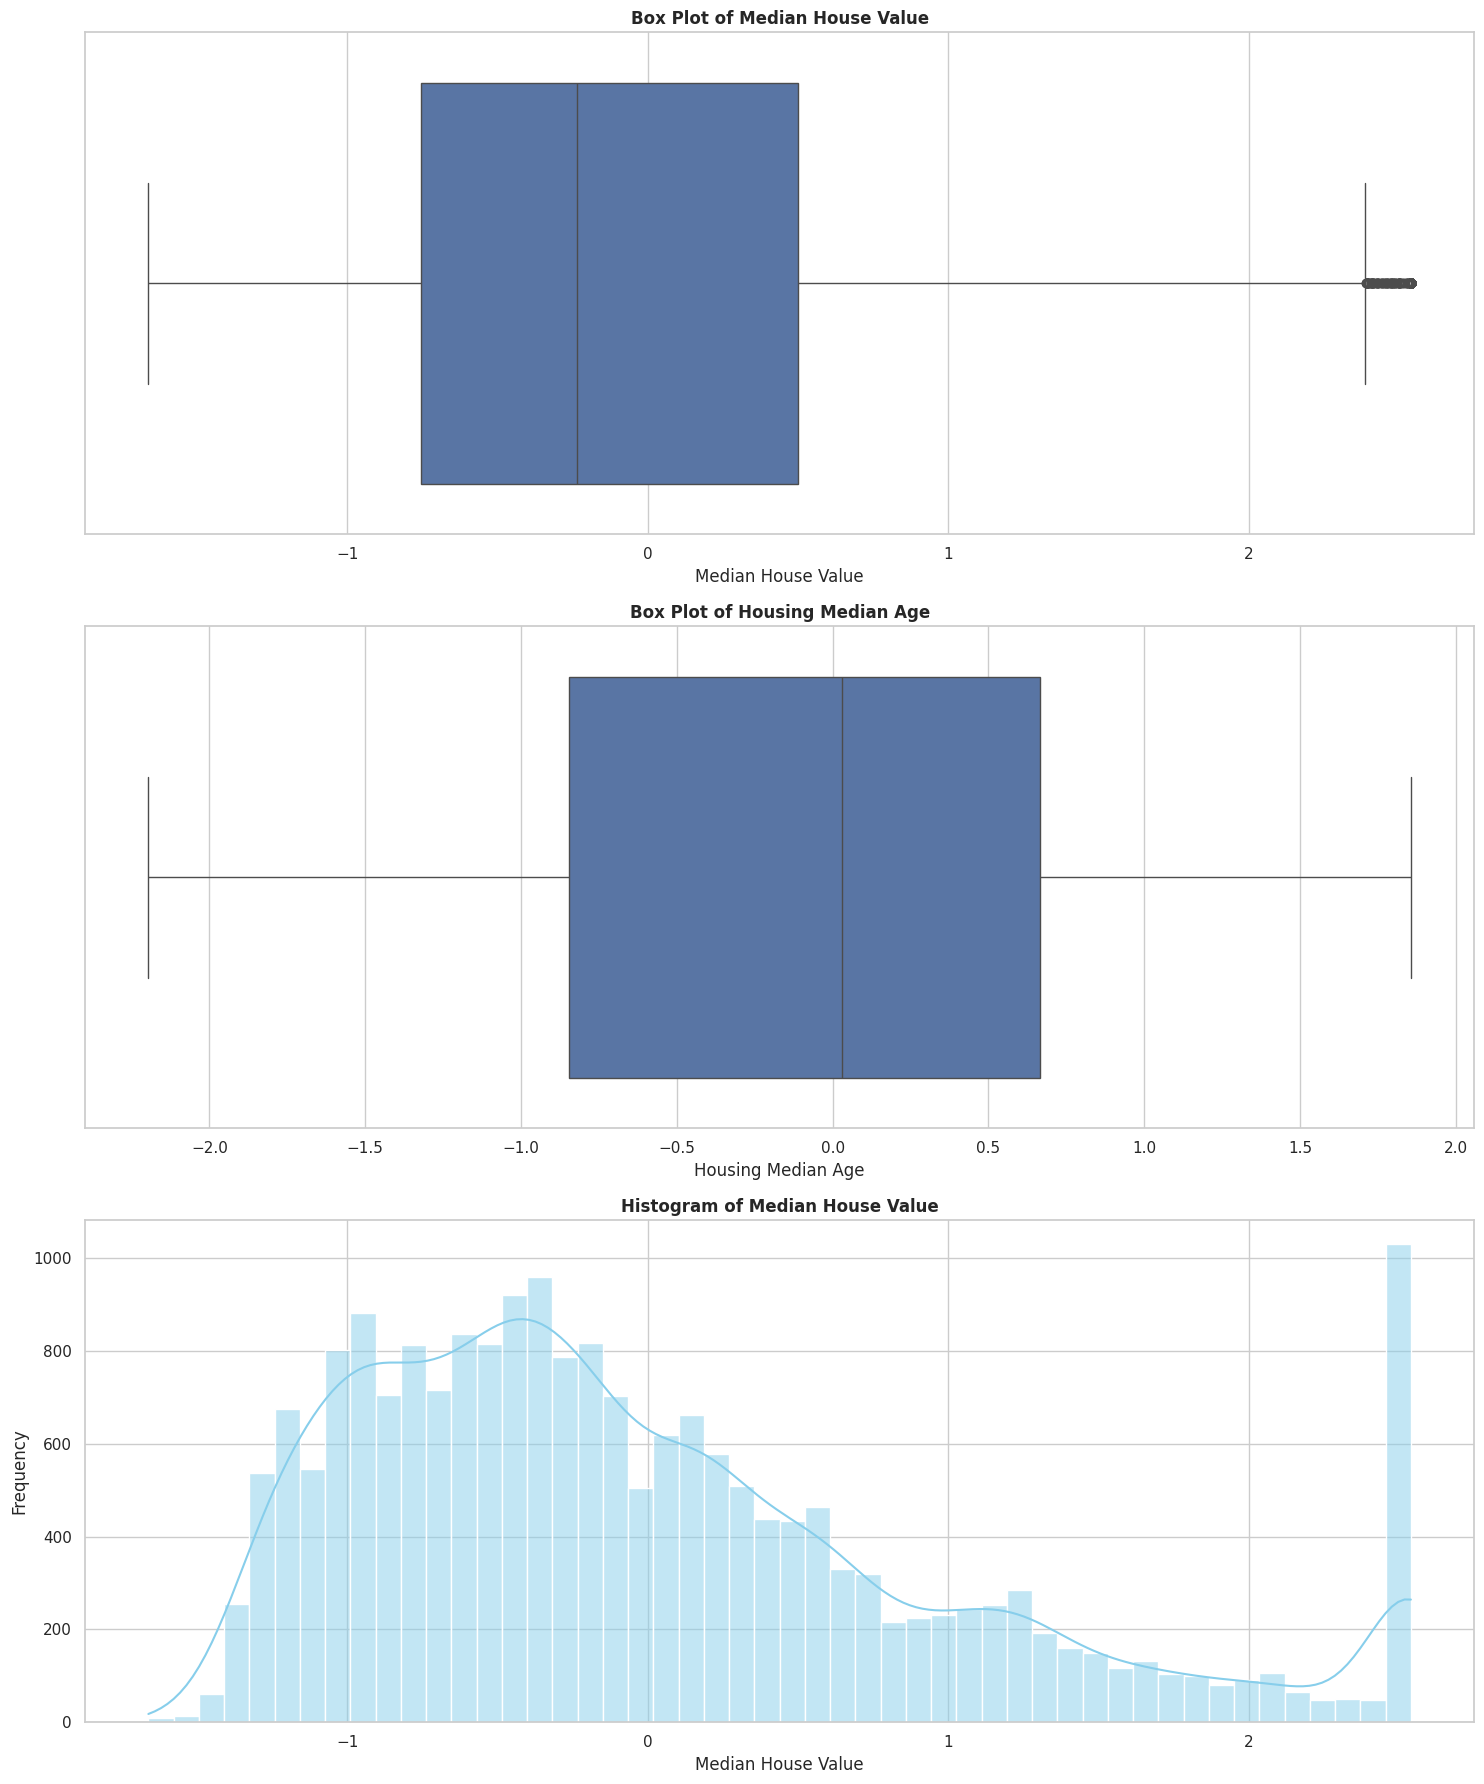

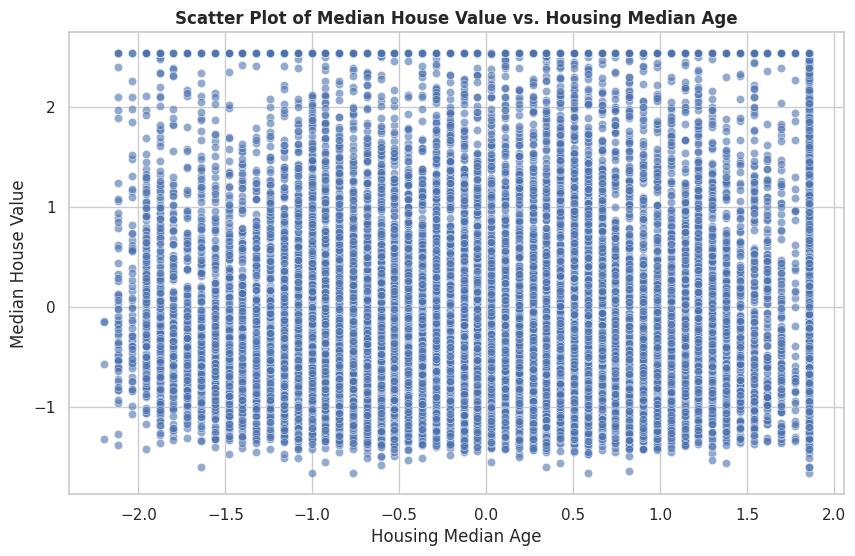

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# 1. Box plot for median_house_value
sns.boxplot(ax=axes[0], x=df_normalized['median_house_value'])
axes[0].set_title('Box Plot of Median House Value')
axes[0].set_xlabel('Median House Value')

# 2. Box plot for housing_median_age
sns.boxplot(ax=axes[1], x=df_normalized['housing_median_age'])
axes[1].set_title('Box Plot of Housing Median Age')
axes[1].set_xlabel('Housing Median Age')

# 3. Histogram for median_house_value
sns.histplot(df_normalized['median_house_value'], bins=50, kde=True, ax=axes[2], color='skyblue')
axes[2].set_title('Histogram of Median House Value')
axes[2].set_xlabel('Median House Value')
axes[2].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

# 4. Create a scatter plot for median_house_value vs. housing_median_age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_normalized, x='housing_median_age', y='median_house_value', alpha=0.6)
plt.title('Scatter Plot of Median House Value vs. Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()


### Question 6: Dissimilarity Matrix for Mixed-Type Attributes
Calculate the **dissimilarity matrix** for **the first 10 data samples** for the following attributes: **`housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `ew_median_house_value`(Ordinal), `ocean_proximity`(Nominal)**.

The dissimilarity $d(i,j)$ between objects $i$ and $j$ is defined as:

$$d(i,j)=\frac{\sum^p_{f=1}δ^f_{ij}d^f_{ij}}{\sum^p_{f=1}δ^f_{ij}}$$

where the indicator of attribute $f$, $δ^f_{ij}=0$ in the following cases:
1. If $x_i^f$ or $x_j^f$ is missing.
2. If $x_i^f = x_j^f = 0$ and the attribute $f$ is asymmetric binary.
3. Otherwise, $δ^f_{ij}=1$.

For each attribute type:
- **Numeric**: $d_{ij}^{f} = \frac{|x_i^f-x_j^f|}{\text{max}_f-\text{min}_f}$.
- **Nominal/Binary**: $d_{ij}^f = 0$ if $x_i^f = x_j^f$; otherwise, $d_{ij}^f = 1$.
- **Ordinal**: Suppose that $f$ is an ordinal attribute and has $M_f$ ordered states. Let $1, . . . , M_f$ represent ranking of these ordered states. The dissimilarity of $f$ can be calculated by: normalize the rank $r_i^f$ of the object $i$ and attribute $f$ by $z_i^f = \frac{r_i^f-1}{M_f-1}$, and then compute the dissimilarity using **Euclidean distance**  

In [ ]:
# Keep only the first 10 samples for analysis
df_subset = df.head(10).copy()

# Create ew_median_house_value as a categorical feature with equal-width binning
bins = [0, 200000, 500000, np.inf]  # Define the bins
labels = ['low', 'medium', 'high']  # Define the labels
df_subset['ew_median_house_value'] = pd.cut(df_subset['median_house_value'], bins=bins, labels=labels)

# Dissimilarity matrix
num_samples = df_subset.shape[0]
dissimilarity_matrix = np.zeros((num_samples, num_samples))

# Helper functions for dissimilarity calculations
def numeric_dissimilarity(x_i, x_j, min_val, max_val):
    return abs(x_i - x_j) / (max_val - min_val)

def ordinal_dissimilarity(rank_i, rank_j, m):
    z_i = (rank_i - 1) / (m - 1)  # Normalize rank
    z_j = (rank_j - 1) / (m - 1)  # Normalize rank
    return np.sqrt((z_i - z_j) ** 2)

# Calculate the dissimilarity matrix
for i in range(num_samples):
    for j in range(num_samples):
        if i != j:  # Only calculate for different samples
            delta = 0  # To count the number of valid attributes for normalization
            dissimilarity = 0  # Accumulate the dissimilarity

            # Attributes: housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ew_median_house_value, ocean_proximity
            # Numeric attributes
            for attr in ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']:
                if pd.isnull(df_subset.at[i, attr]) or pd.isnull(df_subset.at[j, attr]):
                    continue  # Skip if there's a missing value
                delta += 1
                dissimilarity += numeric_dissimilarity(df_subset.at[i, attr], df_subset.at[j, attr],
                                                        df_subset[attr].min(), df_subset[attr].max())

            # Ordinal attribute ew_median_house_value
            ew_values = df_subset['ew_median_house_value'].cat.codes  # Get integer codes for categories
            if ew_values[i] != ew_values[j]:
                delta += 1
                dissimilarity += ordinal_dissimilarity(ew_values[i], ew_values[j], len(labels))

            # Nominal attribute ocean_proximity
            if df_subset.at[i, 'ocean_proximity'] != df_subset.at[j, 'ocean_proximity']:
                delta += 1
                dissimilarity += 1  # Binary dissimilarity for nominal attribute

            if delta > 0:
                dissimilarity_matrix[i, j] = dissimilarity / delta

# Convert to DataFrame for better visualization
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, columns=[f'Sample {i+1}' for i in range(num_samples)],
                                 index=[f'Sample {i+1}' for i in range(num_samples)])

# Display the dissimilarity matrix
print("Dissimilarity Matrix for the first 10 samples:")
display(dissimilarity_df)


Dissimilarity Matrix for the first 10 samples:


,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9,Sample 10
Sample 1,0.000000,0.774829,0.136124,0.193599,0.265842,0.207297,0.415227,0.505595,0.456476,0.548308
Sample 2,0.774829,0.000000,0.812711,0.841403,0.865075,0.913447,0.725677,0.664084,0.661168,0.590882
Sample 3,0.136124,0.812711,0.000000,0.067820,0.129718,0.113853,0.279103,0.369472,0.427879,0.412184
Sample 4,0.193599,0.841403,0.067820,0.000000,0.072243,0.072043,0.221628,0.311996,0.370404,0.354709
Sample 5,0.265842,0.865075,0.129718,0.072243,0.000000,0.058545,0.149385,0.239753,0.298161,0.282466
Sample 6,0.207297,0.913447,0.113853,0.072043,0.058545,0.000000,0.207931,0.298299,0.356706,0.341012
Sample 7,0.415227,0.725677,0.279103,0.221628,0.149385,0.207931,0.000000,0.090368,0.148776,0.134794
Sample 8,0.505595,0.664084,0.369472,0.311996,0.239753,0.298299,0.090368,0.000000,0.112467,0.073202
Sample 9,0.456476,0.661168,0.427879,0.370404,0.298161,0.356706,0.148776,0.112467,0.000000,0.177813
Sample 10,0.548308,0.590882,0.412184,0.354709,0.282466,0.341012,0.134794,0.073202,0.177813,0.000000
